<a href="https://colab.research.google.com/github/varun-beep/DeepLearning/blob/main/Implement%20a%20CNN%20on%20the%20MNIST%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [11]:
# 1. Load the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
# 2. Preprocess the Data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to (28,28,1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

In [14]:
# 3. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [15]:
# Early Stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [18]:
# 4. Compile and Train the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 94ms/step - accuracy: 0.9563 - loss: 0.2602 - val_accuracy: 0.9919 - val_loss: 0.1474
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9579 - loss: 0.2601 - val_accuracy: 0.9907 - val_loss: 0.1543
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.9606 - loss: 0.2591 - val_accuracy: 0.9916 - val_loss: 0.1486
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9591 - loss: 0.2585 - val_accuracy: 0.9918 - val_loss: 0.1494


In [19]:
# 5. Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9901 - loss: 0.1530
Test Accuracy: 0.9919


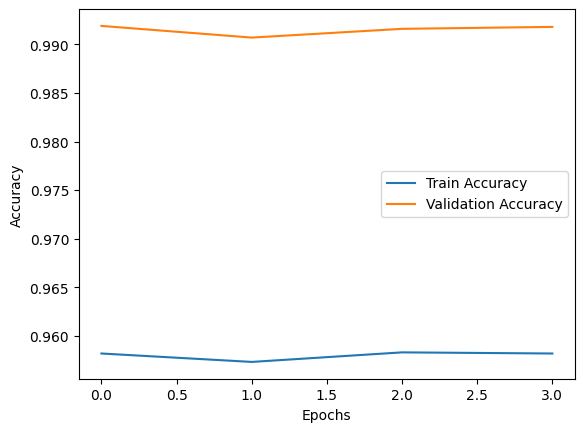

In [20]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()